In [6]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("./resultados_avaliacao.csv")

In [8]:
def extrair_texto(coluna):
    if '[' in coluna:
        match = re.search(r'\[(.*?)\]', coluna)
        return match.group(1) if match else coluna
    return coluna

def quebrar_texto(texto, max_chars=30):
    palavras = texto.split()
    linhas = []
    linha_atual = ""
    
    for palavra in palavras:
        if len(linha_atual) + len(palavra) + 1 > max_chars:
            linhas.append(linha_atual.strip())
            linha_atual = palavra + " "
        else:
            linha_atual += palavra + " "
    
    if linha_atual:
        linhas.append(linha_atual.strip())
    
    return "\n".join(linhas)

In [9]:
def plota_grafico(str, indice):
    data = {
        'Topico': str,
        'Perguntas': []
    }

    for i in df:
        data_pergunta = {
            'Pergunta': "",
            'Concordo Totalmente': 0,
            'Concordo': 0,
            'Indiferente': 0,
            'Discordo': 0,
            'Discordo Totalmente': 0,
        }
        if data['Topico'] in i:
            data_pergunta['Pergunta'] = extrair_texto(i)

            contagem_respostas = df[i].value_counts()
            for resposta in contagem_respostas.index:
                data_pergunta[resposta] = contagem_respostas[resposta]
            data['Perguntas'].append(data_pergunta)
    
    # Gerar lista de perguntas com letras (a), (b), (c), etc.
    perguntas = [
        f"({chr(97 + idx)}) {quebrar_texto(pergunta['Pergunta'])}" 
        for idx, pergunta in enumerate(data['Perguntas'])
    ]
    
    valores = np.array([
        [
            pergunta['Discordo Totalmente'],
            pergunta['Discordo'],
            pergunta['Indiferente'],
            pergunta['Concordo'],
            pergunta['Concordo Totalmente']
        ] 
        for pergunta in data['Perguntas']
    ])

    print(valores)

    # Definindo categorias e cores para representar a escala de concordância
    categorias = ['Discordo Totalmente', 'Discordo', 'Indiferente', 'Concordo', 'Concordo Totalmente']
    cores = ['#F57C00', '#D32F2F', '#FFEB3B', '#42A5F5', '#388E3C']  # Gradiente atualizado com azul claro
    largura = 0.15  # Largura de cada barra
    x = np.arange(len(perguntas))  # Posições das perguntas

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotando as barras para cada categoria e adicionando números acima das barras
    for i in range(len(categorias)):
        barras = ax.bar(x + i * largura, valores[:, i], largura, label=categorias[i], color=cores[i])
        
        # Adiciona o número acima de cada barra
        for barra in barras:
            yval = barra.get_height()
            ax.text(barra.get_x() + barra.get_width() / 2, yval, int(yval), 
                    ha='center', va='bottom')

    # Configurando o gráfico
    ax.set_ylabel('Respostas')
    ax.set_title(str)
    ax.set_xticks(x + largura * (len(categorias) - 1) / 2)
    ax.set_xticklabels(perguntas)
    ax.legend()

    # Ajuste de espaço entre barras e linhas de grade
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    # Ajuste do layout
    plt.tight_layout()

    # Salvar o gráfico com o índice
    plt.savefig(f"{indice}.png")

    # Exibir o gráfico
    plt.show()

[[ 2 11  4 30 25]
 [ 0  7 12 37 16]
 [ 3 13  5 24 27]]


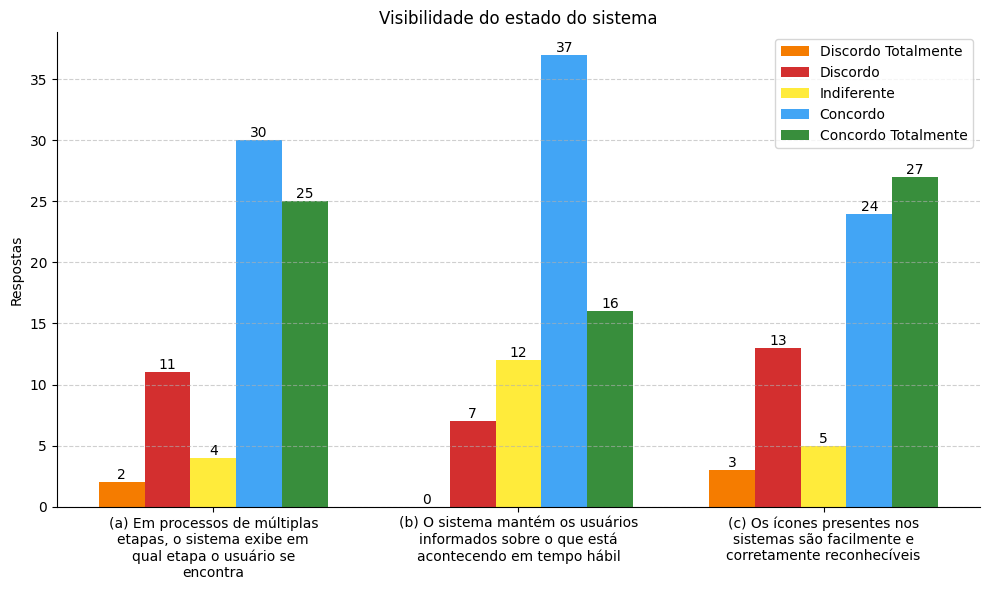

In [10]:
plota_grafico('Visibilidade do estado do sistema', 1)
# plota_grafico_horizontal('Visibilidade do estado do sistema')

[[ 1  9 10 26 26]
 [ 1 11  2 29 29]
 [ 3 10 14 25 20]
 [ 3  9 10 36 14]]


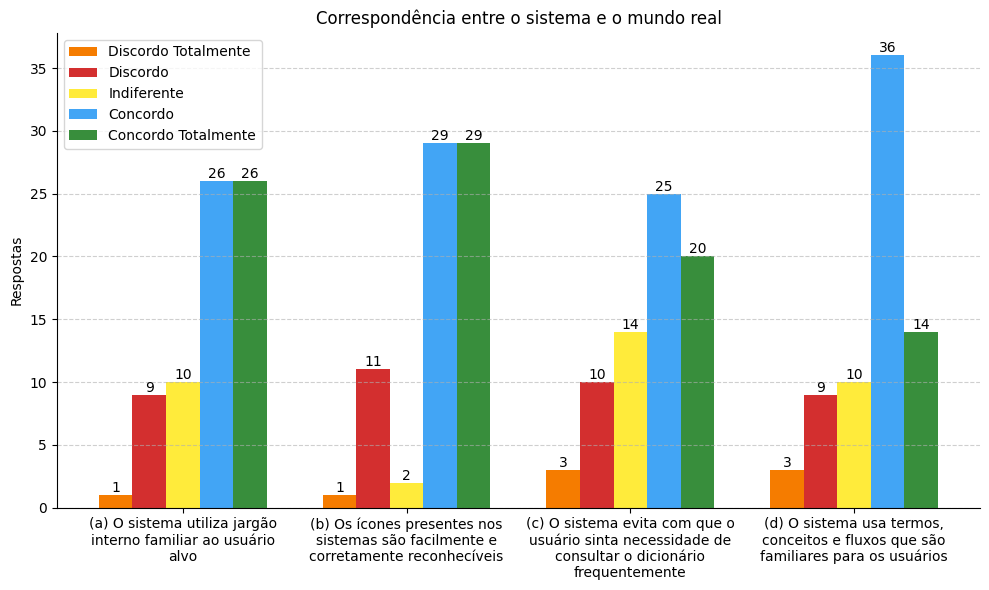

In [11]:
plota_grafico('Correspondência entre o sistema e o mundo real', 2)
# plota_grafico_horizontal('Correspondência entre o sistema e o mundo real')

[[ 3 12 13 29 15]
 [ 5 21  8 23 15]]


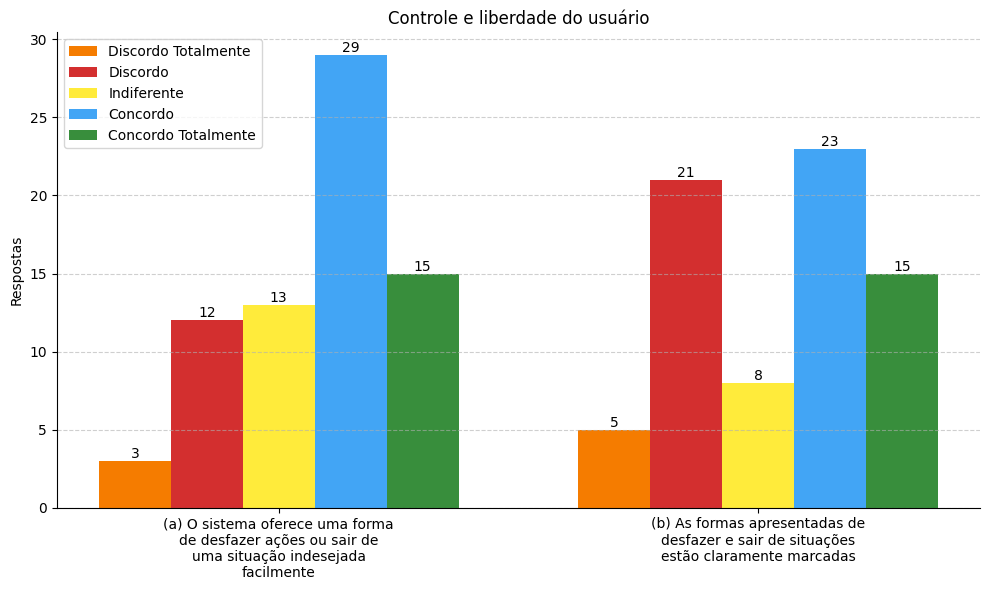

In [12]:
plota_grafico('Controle e liberdade do usuário', 3)
# plota_grafico_horizontal('Controle e liberdade do usuário')

[[ 0  5  6 37 24]
 [ 0  6  1 41 24]]


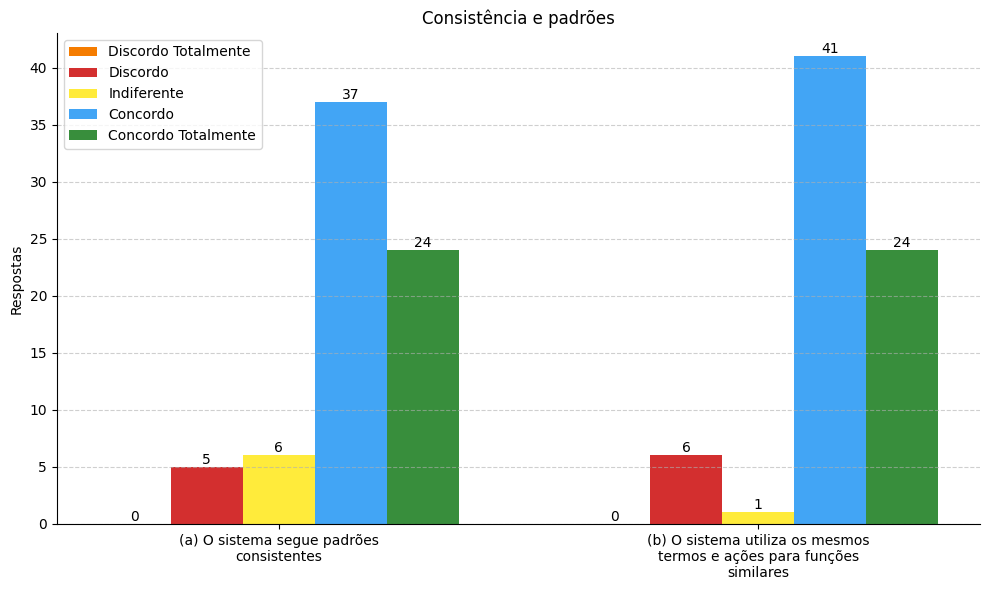

In [13]:
plota_grafico('Consistência e padrões', 4)
# plota_grafico_horizontal('Consistência e padrões')

[[ 5 23 16 15 13]
 [ 3 23 10 21 15]]


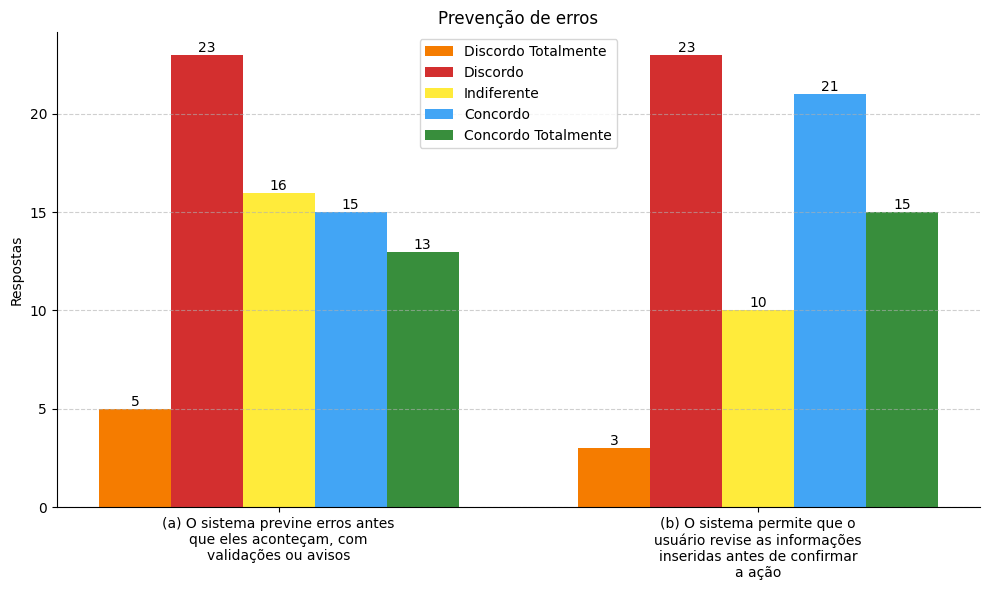

In [14]:
plota_grafico('Prevenção de erros', 5)
# plota_grafico_horizontal('Prevenção de erros')

[[ 5 19 14 21 13]
 [ 4 15 20 25  8]
 [ 0  8 27 23 14]]


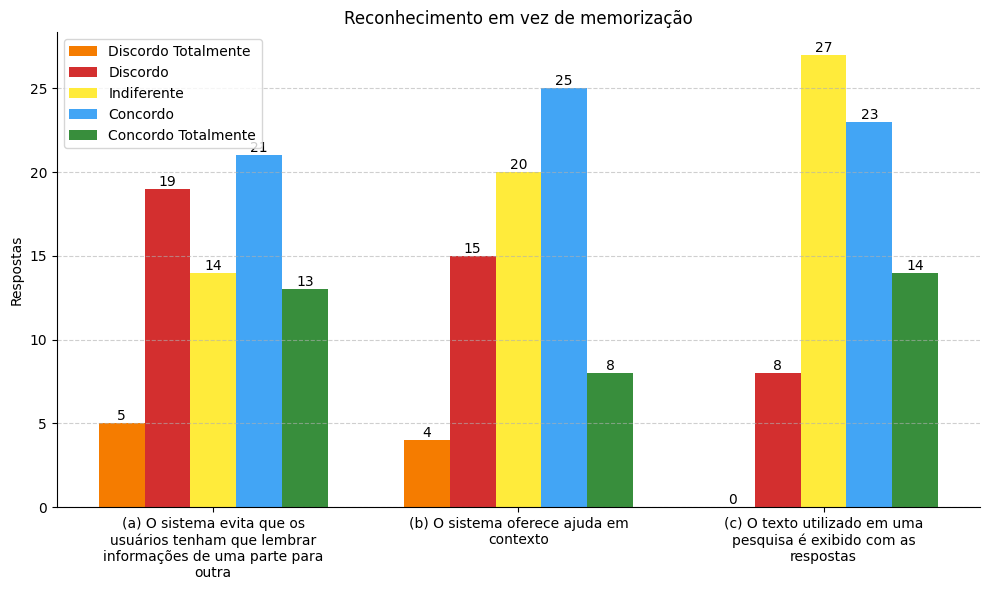

In [15]:
plota_grafico('Reconhecimento em vez de memorização', 6)
# plota_grafico_horizontal('Reconhecimento em vez de memorização')

[[ 8 14 25 22  3]
 [15 14 33  8  2]]


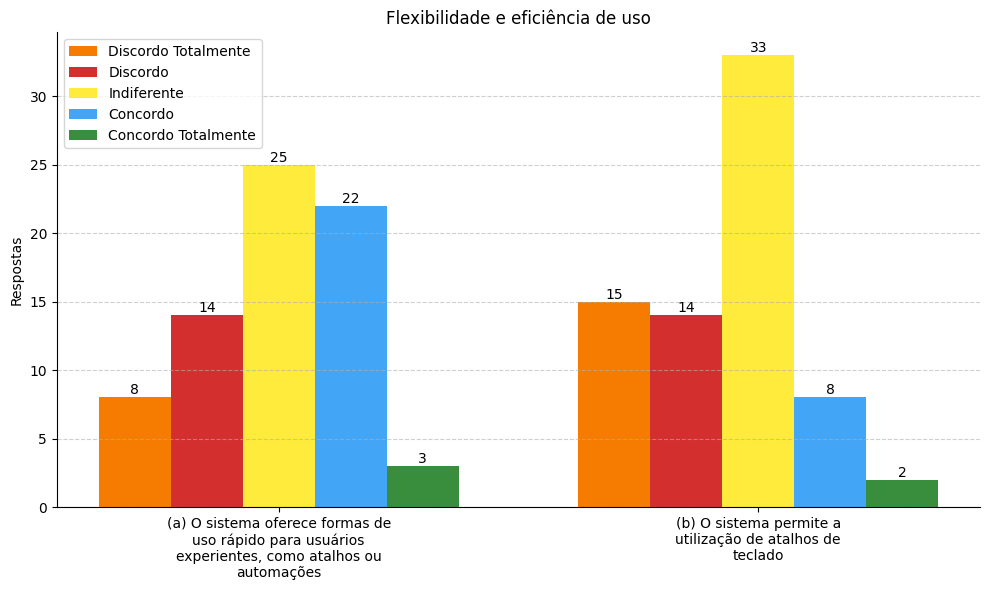

In [16]:
plota_grafico('Flexibilidade e eficiência de uso', 7)
# plota_grafico_horizontal('Flexibilidade e eficiência de uso')

[[ 2  6  2 34  0]
 [ 3 10  2 26  0]
 [ 2  3  9 31  0]]


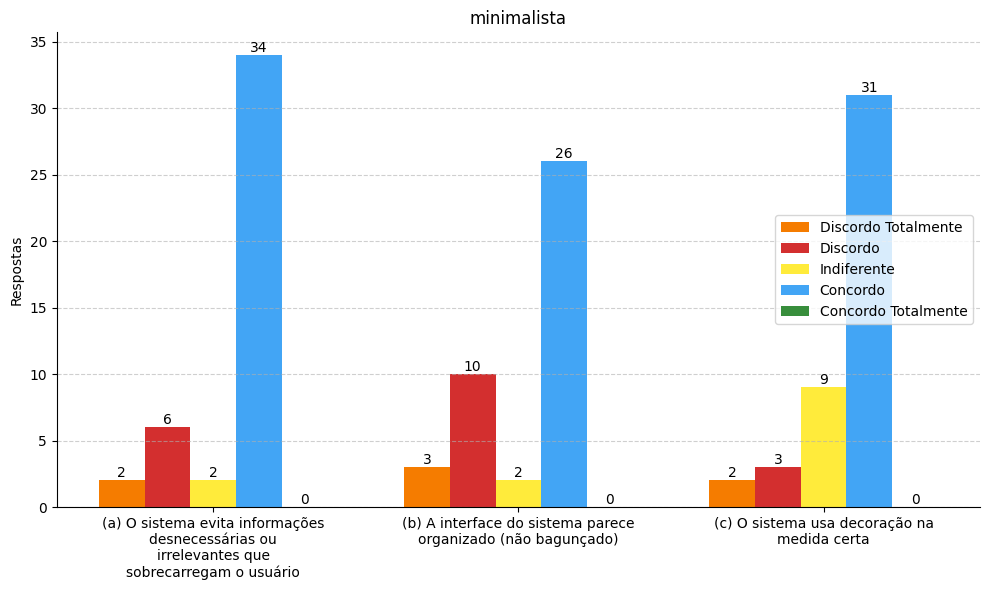

In [21]:
plota_grafico('minimalista', 8)
# plota_grafico_horizontal('Design estético e minimalista')

[[ 8 19 12 21 12]
 [ 2  7 10 27 26]
 [ 9 12 16 14 21]]


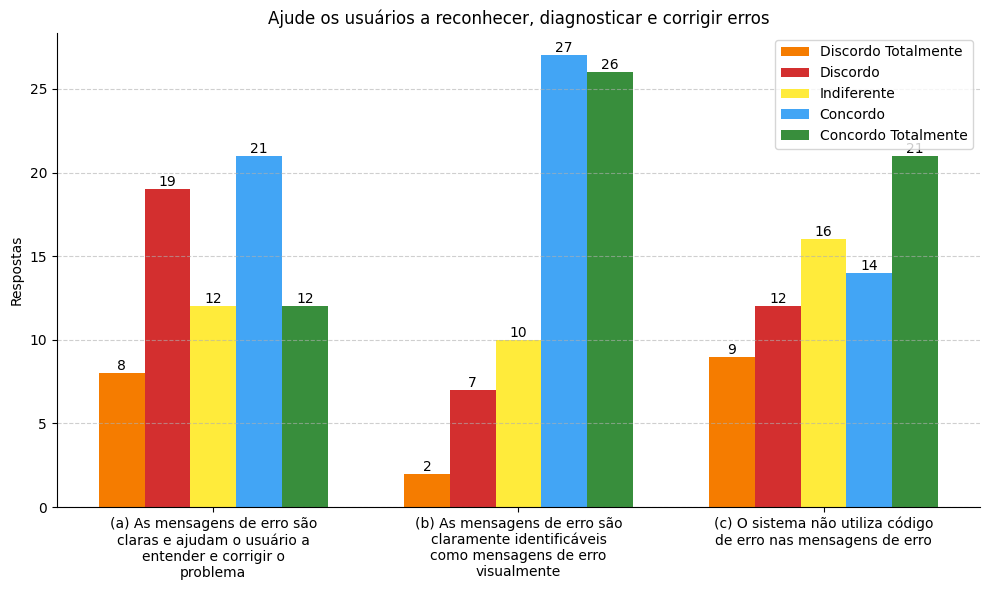

In [18]:
plota_grafico('Ajude os usuários a reconhecer, diagnosticar e corrigir erros', 9)
# plota_grafico_horizontal('Ajude os usuários a reconhecer, diagnosticar e corrigir erros')

[[ 6 10 13 19 24]
 [ 4 14 15 17 22]
 [22 20 17 10  3]]


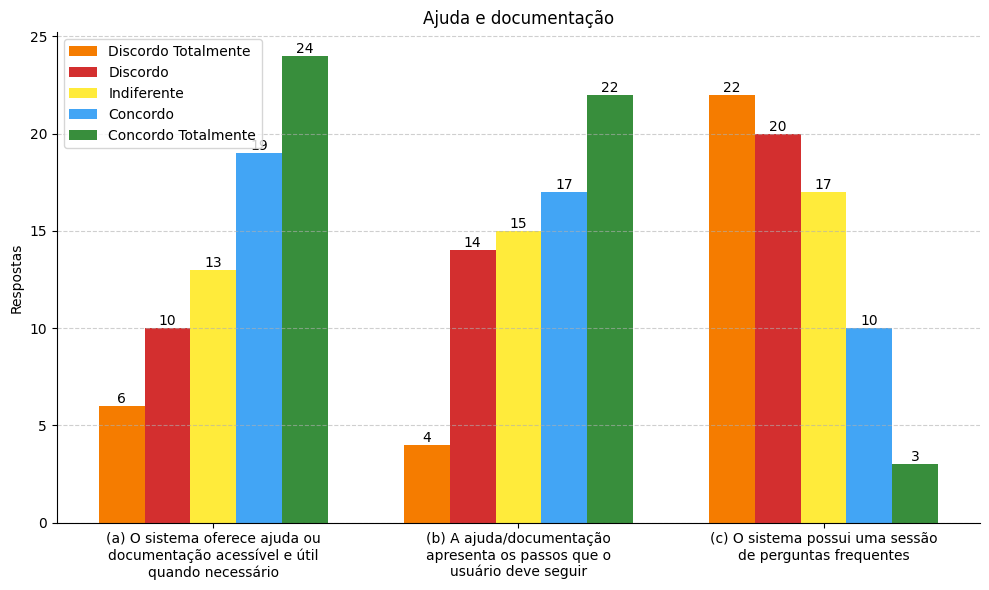

In [19]:
plota_grafico('Ajuda e documentação', 10)
# plota_grafico_horizontal('Ajuda e documentação')

In [20]:

def plota_grafico_horizontal(str): 
     # Cria uma estrutura de dados com as perguntas e contagem de respostas
    data = {
        'Topico': str,
        'Perguntas': []
    }

    # Percorre as colunas do DataFrame para encontrar perguntas do tópico
    for coluna in df.columns:
        if data['Topico'] in coluna:
            # Extrai a pergunta e calcula contagem de respostas
            pergunta = extrair_texto(coluna)
            contagem_respostas = df[coluna].value_counts()
            
            # Estrutura para armazenar os valores de cada categoria para a pergunta
            data_pergunta = {
                'Pergunta': pergunta,
                'Discordo Totalmente': contagem_respostas.get('Discordo Totalmente', 0),
                'Discordo': contagem_respostas.get('Discordo', 0),
                'Indiferente': contagem_respostas.get('Indiferente', 0),
                'Concordo': contagem_respostas.get('Concordo', 0),
                'Concordo Totalmente': contagem_respostas.get('Concordo Totalmente', 0),
            }
            data['Perguntas'].append(data_pergunta)

    # Organizando os dados para o gráfico
    perguntas = [quebrar_texto(pergunta['Pergunta']) for pergunta in data['Perguntas']]
    valores = np.array([[pergunta['Discordo Totalmente'],
                         pergunta['Discordo'],
                         pergunta['Indiferente'],
                         pergunta['Concordo'],
                         pergunta['Concordo Totalmente']] for pergunta in data['Perguntas']])

    # Definindo as categorias e cores
    categorias = ['Discordo Totalmente', 'Discordo', 'Indiferente', 'Concordo', 'Concordo Totalmente']
    cores = ['#0c2340', '#d62828', '#fca311', '#ffba08', '#4CAF50']

    fig, ax = plt.subplots(figsize=(10, 6))

    # Cria as barras empilhadas
    left = np.zeros(len(perguntas))  # Inicializa a posição da barra para cada pergunta
    for i, (categoria, cor) in enumerate(zip(categorias, cores)):
        ax.barh(perguntas, valores[:, i], left=left, color=cor, label=categoria)
        # Adiciona os valores absolutos no centro de cada segmento de barra
        for j, valor in enumerate(valores[:, i]):
            if valor != 0:
                ax.text(left[j] + valor / 2, j, f"{int(valor)}", va='center', ha='center', color="white")
        left += valores[:, i]  # Atualiza a posição de início para a próxima barra

    # Configurações do gráfico
    ax.set_title(f'{str}')
    ax.set_xlabel('Contagem')
    ax.set_xlim(0, valores.sum(axis=1).max() * 1)  # Define o limite do eixo x com base no total máximo

    # Legenda compacta
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small', ncol=1, handlelength=1, borderaxespad=0.5)
    plt.tight_layout()
    plt.show()